# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin.
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

## Information

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

## Libraries

In [1]:
!pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

# Imbalance Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [3]:
data = pd.read_csv("diabetes.csv")

# Bagian 1

## #1 Baseline Logistic Regression

In [4]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

## #2 Analisis Data

### Preprocessing

In [5]:
print("DATA SIZE: ", data.shape)
cols = data.columns.tolist()
print("COLUMNS", cols)

DATA SIZE:  (50736, 20)
COLUMNS ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes']


### Categorical Grouping

In [6]:
categorical_arr = []
non_categorical_arr = []

for col in cols: 
  # Check for unique data of the column
  # print("COLUMN NAME: ", col)
  data_col = data[col]
  unique_data = pd.unique(data_col)
  # print("\t Data Type:", data_col.dtypes)
  # print("\t Unique Data Amount: ",len(unique_data))
  # print("\t Data Example:", unique_data[:5])

  if (data_col.dtype.name == "object"):
    categorical_arr.append(col)
  elif (data_col.dtype.name == "bool"):
    categorical_arr.append(col)
  else :
    if ((data_col.dtype.name == 'int64' or data_col.dtype.name == 'float64') and len(unique_data) <= 2):
      categorical_arr.append(col)
    else:
      non_categorical_arr.append(col)


print("CATEGORICAL")
print(categorical_arr)
print("NON CATEGORICAL")
print(non_categorical_arr)

CATEGORICAL
['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'DiffWalk', 'Sex', 'Diabetes']
NON CATEGORICAL
['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


### Categorical Data

In [7]:
# For categorial data
categorical_dict = dict()

for col in categorical_arr:
    data_col = data[col]
    unique_data = pd.unique(data_col)

    # Register to Dict
    col_dict = dict()
    col_dict["unique_data"] = unique_data

    unique_data_amount = []
    for unique in unique_data:
        data_col_unique = data_col[data_col == unique]
        unique_data_amount.append(len(data_col_unique))

    col_dict["unique_data_amount"] = unique_data_amount
    categorical_dict[col] = col_dict

    for k, v in categorical_dict.items():
        print(k)
        for ck, cv in v.items():
            print("\t", ck, ":", cv)
        print("\n")

HighBP
	 unique_data : [0. 1.]
	 unique_data_amount : [29076, 21660]


HighBP
	 unique_data : [0. 1.]
	 unique_data_amount : [29076, 21660]


HighChol
	 unique_data : [1. 0.]
	 unique_data_amount : [21352, 29384]


HighBP
	 unique_data : [0. 1.]
	 unique_data_amount : [29076, 21660]


HighChol
	 unique_data : [1. 0.]
	 unique_data_amount : [21352, 29384]


Smoker
	 unique_data : [0. 1.]
	 unique_data_amount : [28080, 22656]


HighBP
	 unique_data : [0. 1.]
	 unique_data_amount : [29076, 21660]


HighChol
	 unique_data : [1. 0.]
	 unique_data_amount : [21352, 29384]


Smoker
	 unique_data : [0. 1.]
	 unique_data_amount : [28080, 22656]


Stroke
	 unique_data : [0. 1.]
	 unique_data_amount : [48693, 2043]


HighBP
	 unique_data : [0. 1.]
	 unique_data_amount : [29076, 21660]


HighChol
	 unique_data : [1. 0.]
	 unique_data_amount : [21352, 29384]


Smoker
	 unique_data : [0. 1.]
	 unique_data_amount : [28080, 22656]


Stroke
	 unique_data : [0. 1.]
	 unique_data_amount : [48693, 2043]




### Non-categorical Data

In [8]:
# For non categorial data

non_categorical_dict = dict()

for col in non_categorical_arr:
  col_dict = dict()
  # print("Column Data", col)
  data_col = data[col]
  desc_data = data_col.describe().tolist()
  # print(data_col.describe())
  col_dict['count'] = desc_data[0]
  col_dict['mean'] = desc_data[1]
  col_dict['std'] = desc_data[2]
  col_dict['min'] = desc_data[3]
  col_dict['q1'] = desc_data[4]
  col_dict['q2'] = desc_data[5]
  col_dict['q3'] = desc_data[6]
  col_dict['max'] = desc_data[7]

  # Register to Dict
  non_categorical_dict[col] = col_dict

for k, v in non_categorical_dict.items():
  print(k)
  for ck, cv in v.items():
    print("\t", ck, ":", cv)
  print("\n")

BMI
	 count : 50736.0
	 mean : 28.418282876064332
	 std : 6.6600234314973905
	 min : 13.0
	 q1 : 24.0
	 q2 : 27.0
	 q3 : 31.0
	 max : 98.0


GenHlth
	 count : 50736.0
	 mean : 2.5126143172500788
	 std : 1.0682063859384532
	 min : 1.0
	 q1 : 2.0
	 q2 : 2.0
	 q3 : 3.0
	 max : 5.0


MentHlth
	 count : 50736.0
	 mean : 3.2105605487228
	 std : 7.452968176105377
	 min : 0.0
	 q1 : 0.0
	 q2 : 0.0
	 q3 : 2.0
	 max : 30.0


PhysHlth
	 count : 50736.0
	 mean : 4.232655313781142
	 std : 8.709577523969
	 min : 0.0
	 q1 : 0.0
	 q2 : 0.0
	 q3 : 3.0
	 max : 30.0


Age
	 count : 50736.0
	 mean : 8.025090665405235
	 std : 3.0539031133196244
	 min : 1.0
	 q1 : 6.0
	 q2 : 8.0
	 q3 : 10.0
	 max : 13.0


Education
	 count : 50736.0
	 mean : 5.045135603910438
	 std : 0.9893952276359583
	 min : 1.0
	 q1 : 4.0
	 q2 : 5.0
	 q3 : 6.0
	 max : 6.0


Income
	 count : 50736.0
	 mean : 6.054083885209713
	 std : 2.074314584565774
	 min : 1.0
	 q1 : 5.0
	 q2 : 7.0
	 q3 : 8.0
	 max : 8.0




### Missing Values

In [9]:
# Detect Missing value

for col in cols:
  data_col = data[col]
  print("Data", col, "NaN Value Amount:", data_col.isna().sum())

Data HighBP NaN Value Amount: 0
Data HighChol NaN Value Amount: 0
Data BMI NaN Value Amount: 0
Data Smoker NaN Value Amount: 0
Data Stroke NaN Value Amount: 0
Data HeartDiseaseorAttack NaN Value Amount: 0
Data PhysActivity NaN Value Amount: 0
Data Fruits NaN Value Amount: 0
Data Veggies NaN Value Amount: 0
Data HvyAlcoholConsump NaN Value Amount: 0
Data AnyHealthcare NaN Value Amount: 0
Data GenHlth NaN Value Amount: 0
Data MentHlth NaN Value Amount: 0
Data PhysHlth NaN Value Amount: 0
Data DiffWalk NaN Value Amount: 0
Data Sex NaN Value Amount: 0
Data Age NaN Value Amount: 0
Data Education NaN Value Amount: 0
Data Income NaN Value Amount: 0
Data Diabetes NaN Value Amount: 0


### Data Outliers

In [10]:
# Detect Outlier
# Outlier only works in non-categorical data

idx_of_outliers = []
for col in non_categorical_arr:
  print(col)
  data_col = data[col]
  desc_arr = data_col.describe().tolist()
  q1 = desc_arr[4]
  q3 = desc_arr[6]
  iqr = q3 - q1

  data_lower = np.where(data_col < q1 - 1.5 * iqr)[0]
  data_upper = np.where(data_col > q3 + 1.5 * iqr)[0]
  print("Lower Outlier Amount:", len(data_lower))
  print("Upper Outlier Amount:", len(data_upper))
  print("\n")
  
  data_temp = np.concatenate((data_lower, data_upper), axis=0)
  for i in data_temp:
    if (not i in idx_of_outliers):
      idx_of_outliers.append(i)

BMI
Lower Outlier Amount: 4
Upper Outlier Amount: 1975


GenHlth
Lower Outlier Amount: 0
Upper Outlier Amount: 2365


MentHlth
Lower Outlier Amount: 0
Upper Outlier Amount: 7308


PhysHlth
Lower Outlier Amount: 0
Upper Outlier Amount: 8198


Age
Lower Outlier Amount: 0
Upper Outlier Amount: 0


Education
Lower Outlier Amount: 0
Upper Outlier Amount: 0


Income
Lower Outlier Amount: 0
Upper Outlier Amount: 0




### Duplicate Value

In [11]:
# Detect Duplicated
df_temp = data.duplicated()
df_temp = df_temp[df_temp == True]

idx_of_duplicated = df_temp.index.tolist()
print("Duplicated Value:", len(idx_of_duplicated))
print(idx_of_duplicated)

Duplicated Value: 2329
[282, 416, 482, 600, 928, 1157, 1560, 1594, 1626, 1849, 1971, 2004, 2077, 2277, 2370, 2405, 2650, 2808, 2811, 2866, 3043, 3091, 3264, 3265, 3326, 3503, 3504, 3549, 3582, 3667, 3725, 3747, 3810, 4005, 4132, 4217, 4232, 4314, 4356, 4368, 4472, 4649, 4662, 4699, 4775, 4815, 4940, 4987, 5061, 5074, 5161, 5253, 5349, 5375, 5420, 5463, 5565, 5572, 5595, 5600, 5786, 5802, 5822, 5839, 5855, 5905, 5939, 6095, 6106, 6113, 6224, 6246, 6283, 6397, 6453, 6543, 6555, 6629, 6682, 6713, 6720, 6727, 6776, 6820, 6939, 6966, 6980, 7060, 7134, 7150, 7301, 7307, 7325, 7357, 7378, 7388, 7394, 7417, 7539, 7670, 7691, 7702, 7801, 7812, 7832, 7969, 7991, 7999, 8102, 8141, 8312, 8325, 8392, 8513, 8530, 8582, 8592, 8615, 8625, 8678, 8724, 8741, 8789, 8867, 8897, 8912, 8926, 8932, 8949, 8999, 9054, 9128, 9135, 9148, 9198, 9251, 9301, 9313, 9320, 9335, 9349, 9358, 9359, 9399, 9425, 9426, 9588, 9608, 9621, 9637, 9638, 9704, 9714, 9722, 9728, 9777, 9836, 9893, 9960, 9965, 10067, 10079, 10089, 

### Check Data Reasonableness

In [12]:
# Check if the data is make sense
# Only need to check for Non-categorical Data
# Categorical Data has been checked for its Unique Value above

for col in non_categorical_arr:
  print(col)
  data_col = data[col]
  unique_data = pd.unique(data_col)
  unique_data.sort()
  print("\tFirst 5 Data", unique_data[:5])
  print("\tLast 5 Data", unique_data[-5:])

BMI
	First 5 Data [13. 14. 15. 16. 17.]
	Last 5 Data [87. 89. 92. 95. 98.]
GenHlth
	First 5 Data [1. 2. 3. 4. 5.]
	Last 5 Data [1. 2. 3. 4. 5.]
MentHlth
	First 5 Data [0. 1. 2. 3. 4.]
	Last 5 Data [26. 27. 28. 29. 30.]
PhysHlth
	First 5 Data [0. 1. 2. 3. 4.]
	Last 5 Data [26. 27. 28. 29. 30.]
Age
	First 5 Data [1. 2. 3. 4. 5.]
	Last 5 Data [ 9. 10. 11. 12. 13.]
Education
	First 5 Data [1. 2. 3. 4. 5.]
	Last 5 Data [2. 3. 4. 5. 6.]
Income
	First 5 Data [1. 2. 3. 4. 5.]
	Last 5 Data [4. 5. 6. 7. 8.]


In [13]:
# Delete Data that seems unreasonable
BMI_threshold =  70

data_bmi = data['BMI']
data_bmi_delete = data_bmi[data_bmi > BMI_threshold]
idx_unreasonable = data_bmi_delete.index.tolist()
print(len(idx_unreasonable), "are unreasonable")
print(idx_unreasonable)

132 are unreasonable
[516, 1495, 2017, 2766, 3071, 3082, 3163, 4108, 4647, 4673, 4725, 5036, 5569, 5867, 6222, 6600, 6673, 7011, 8161, 8388, 8549, 8649, 8713, 8729, 9667, 9813, 10604, 10652, 10979, 11426, 11469, 11598, 12737, 12842, 12954, 13295, 13905, 14682, 14930, 15353, 15569, 15788, 16255, 16286, 16535, 17192, 17289, 17782, 17953, 18143, 18424, 18493, 18734, 19258, 19328, 19535, 20013, 20232, 20275, 21064, 21304, 21878, 22031, 22136, 22156, 22163, 22418, 23812, 24462, 24616, 26377, 26385, 27338, 27577, 27684, 28546, 29096, 29312, 29498, 30243, 30410, 30462, 30463, 30992, 31641, 31850, 32046, 32436, 32451, 33375, 33794, 35133, 35565, 36177, 36885, 38238, 39042, 39179, 39665, 40333, 40645, 40852, 41295, 41593, 41977, 42030, 42414, 42728, 42930, 43656, 44263, 44974, 45081, 45247, 46433, 46570, 46908, 47406, 47847, 47965, 48337, 48541, 48577, 48723, 48914, 48972, 49461, 49469, 49861, 50077, 50149, 50557]


### Data Handling

In [14]:
# Handle Missing Value
# Since there is no missing value, there is nothing to do.

# Handle Outliers and Duplicated Data
idx_to_be_dropped = []
# for idx in idx_of_outliers:
#   if (idx not in idx_to_be_dropped):
#     idx_to_be_dropped.append(idx)

for idx in idx_of_duplicated:
  if (idx not in idx_to_be_dropped):
    idx_to_be_dropped.append(idx)

for idx in idx_unreasonable:
  if (idx not in idx_to_be_dropped):
    idx_to_be_dropped.append(idx)

data.drop(index=idx_to_be_dropped, axis=1, inplace=True)
print(len(idx_to_be_dropped), "data has been deleted")

2461 data has been deleted


### Encoding (One-Hot)

In [15]:
data = pd.get_dummies(data[:-1], columns=["Sex"])
data.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes,Sex_F,Sex_M
0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,9.0,6.0,8.0,False,True,False
1,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,1.0,13.0,6.0,8.0,False,False,True
2,1.0,0.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,2.0,20.0,5.0,0.0,12.0,6.0,8.0,False,True,False
3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,30.0,0.0,0.0,1.0,5.0,7.0,False,False,True
4,0.0,0.0,33.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,5.0,30.0,15.0,1.0,11.0,4.0,3.0,False,True,False


### Heatmap Analysis

/tmp/ipykernel_1254/146884869.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
/tmp/ipykernel_1254/146884869.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')


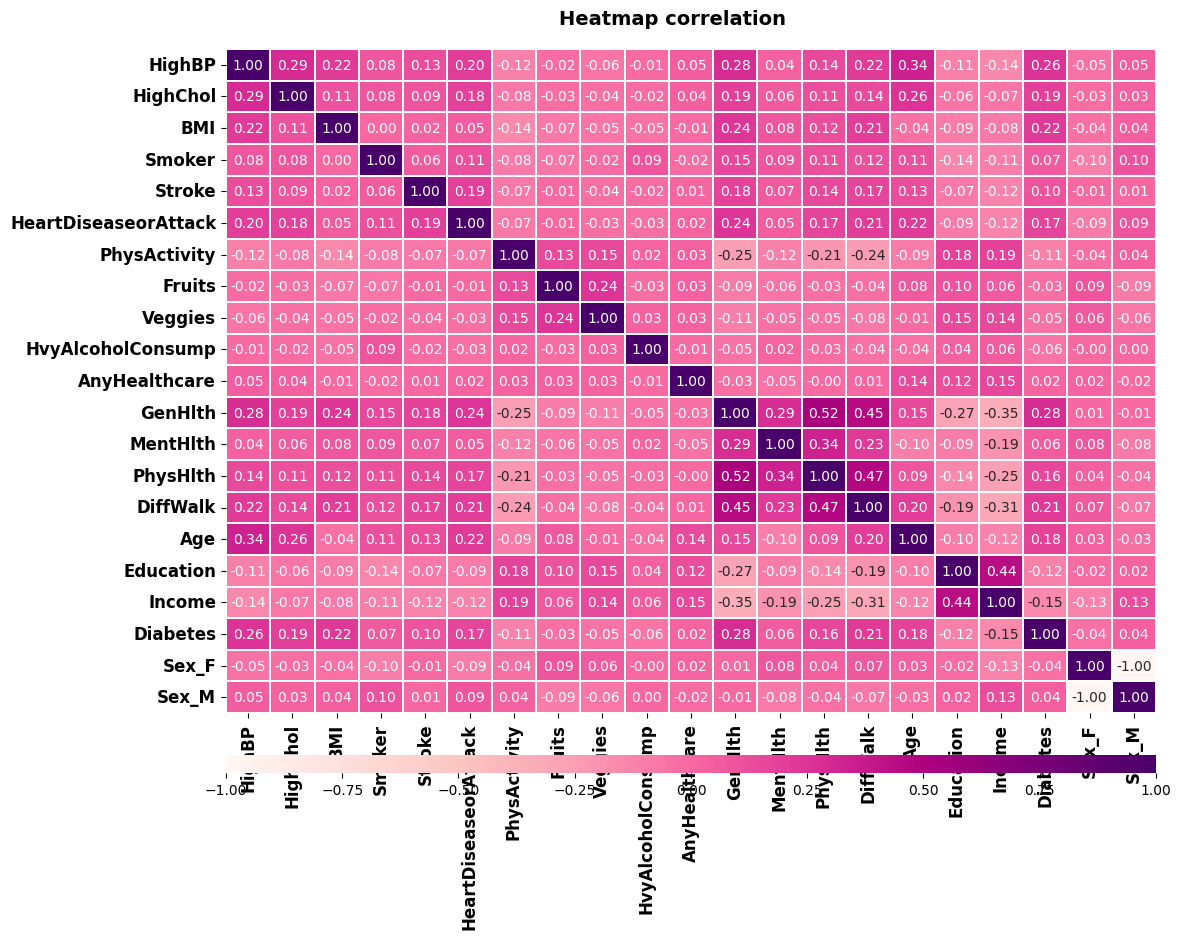

In [16]:
fig4, ax = plt.subplots(figsize=(12, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Heatmap correlation ', fontsize=14, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.05, 'aspect':50}
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

plt.show()

### Scaling

In [17]:
scaler = MinMaxScaler()

for col in non_categorical_arr:
  data_col = data[col]
  data[[col]] = scaler.fit_transform(data[[col]])

data[:10]

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes,Sex_F,Sex_M
0,0.0,1.0,0.192982,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.00,0.000000,0.000000,0.0,0.666667,1.0,1.000000,False,True,False
1,0.0,0.0,0.192982,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.25,0.000000,0.000000,1.0,1.000000,1.0,1.000000,False,False,True
2,1.0,0.0,0.280702,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.25,0.666667,0.166667,0.0,0.916667,1.0,1.000000,False,True,False
3,0.0,0.0,0.263158,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.25,1.000000,0.000000,0.0,0.000000,0.8,0.857143,False,False,True
4,0.0,0.0,0.350877,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.00,1.000000,0.500000,1.0,0.833333,0.6,0.285714,False,True,False
5,0.0,1.0,0.192982,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.00,0.000000,0.000000,0.0,0.666667,0.8,0.428571,False,True,False
6,0.0,0.0,0.122807,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.25,0.033333,0.100000,0.0,0.083333,1.0,0.571429,False,True,False
7,0.0,1.0,0.122807,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.00,0.000000,0.000000,0.0,0.583333,1.0,1.000000,False,True,False
8,0.0,0.0,0.228070,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.25,0.000000,0.000000,0.0,0.333333,0.8,0.857143,False,False,True
9,0.0,0.0,0.245614,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.25,0.000000,0.000000,0.0,0.333333,0.8,1.000000,False,False,True


### Drop Columns

In [18]:
# Drop column
to_be_dropped = ['Sex_M', 'Sex_F', 'HvyAlcoholConsump']
data = data.drop(columns=to_be_dropped)

data.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes
0,0.0,1.0,0.192982,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.000000,0.000000,0.0,0.666667,1.0,1.000000,False
1,0.0,0.0,0.192982,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.25,0.000000,0.000000,1.0,1.000000,1.0,1.000000,False
2,1.0,0.0,0.280702,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.25,0.666667,0.166667,0.0,0.916667,1.0,1.000000,False
3,0.0,0.0,0.263158,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.25,1.000000,0.000000,0.0,0.000000,0.8,0.857143,False
4,0.0,0.0,0.350877,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,0.500000,1.0,0.833333,0.6,0.285714,False


### Feature Engineering

In [19]:
data['Education and Income'] = data['Education'] * data['Income']
to_be_dropped = ['Education', 'Income']
data = data.drop(columns=to_be_dropped)

non_categorical_arr.remove('Education')
non_categorical_arr.remove('Income')
non_categorical_arr.append('Education and Income')

cols.remove('Education')
cols.remove('Income')
cols.append('Education and Income')

data.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Diabetes,Education and Income
0,0.0,1.0,0.192982,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,0.000000,0.000000,0.0,0.666667,False,1.000000
1,0.0,0.0,0.192982,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.25,0.000000,0.000000,1.0,1.000000,False,1.000000
2,1.0,0.0,0.280702,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.25,0.666667,0.166667,0.0,0.916667,False,1.000000
3,0.0,0.0,0.263158,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.25,1.000000,0.000000,0.0,0.000000,False,0.685714
4,0.0,0.0,0.350877,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,0.500000,1.0,0.833333,False,0.171429


### Histogram for Non-categorical Data

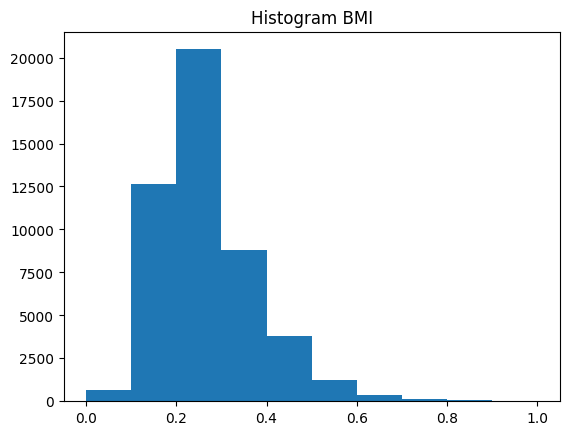

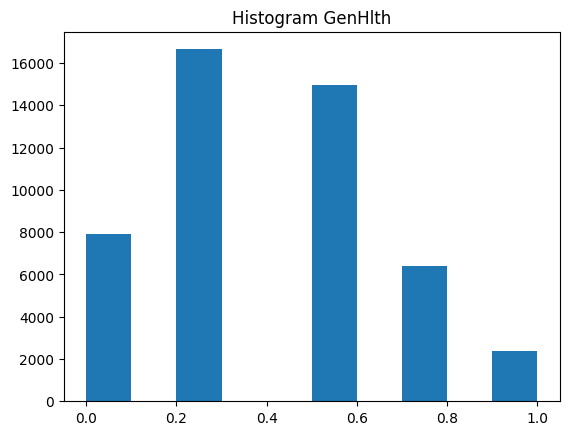

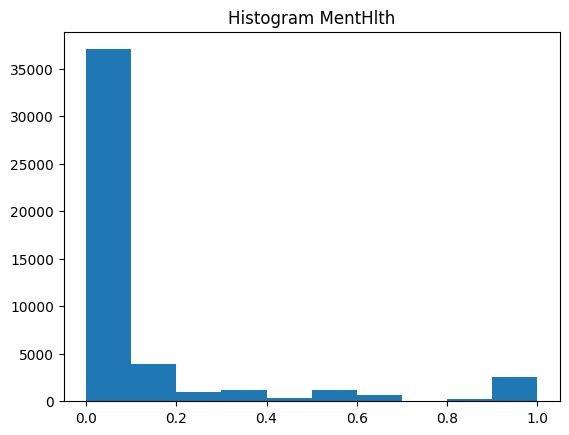

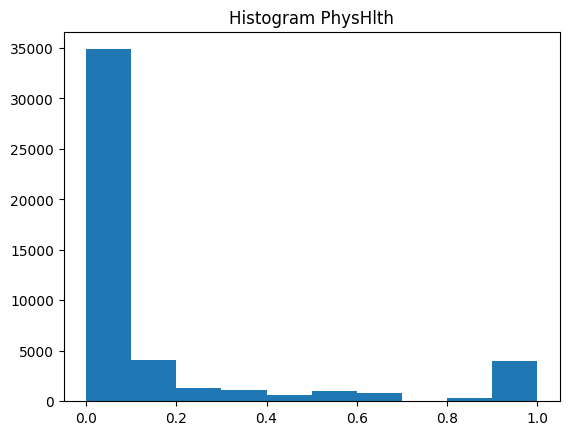

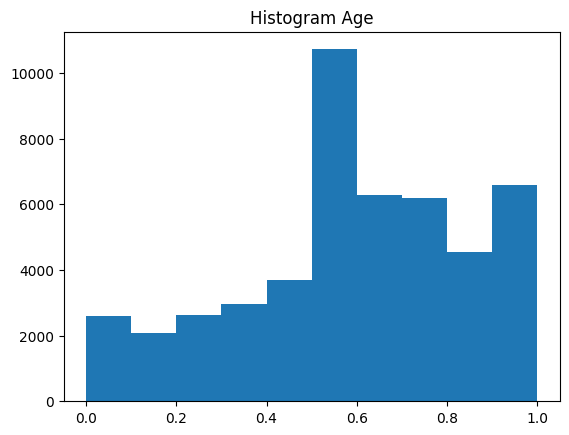

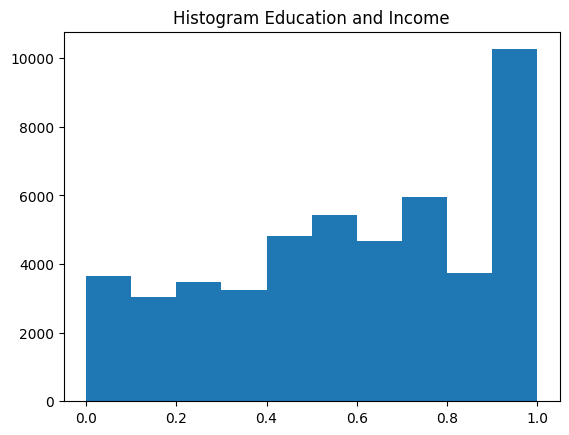

In [20]:
# Check Histogram 

for col in non_categorical_arr:
  data_col = data[col]
  plt.title("Histogram "+col)
  plt.hist(data_col, bins=10)
  plt.show()

### Bar Chart for Categorical Data

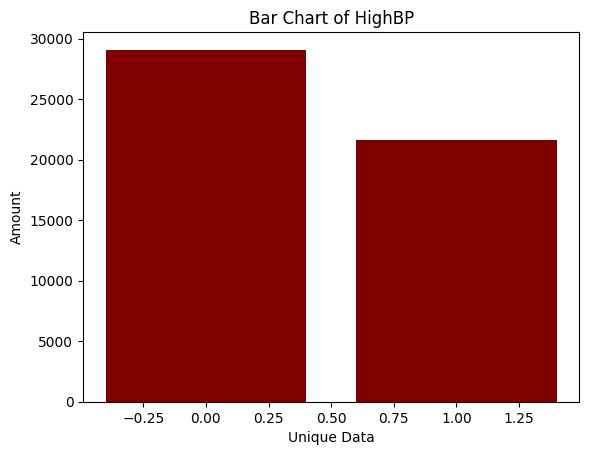

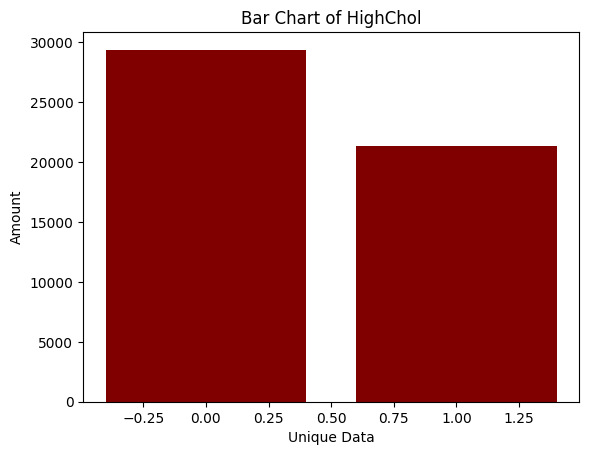

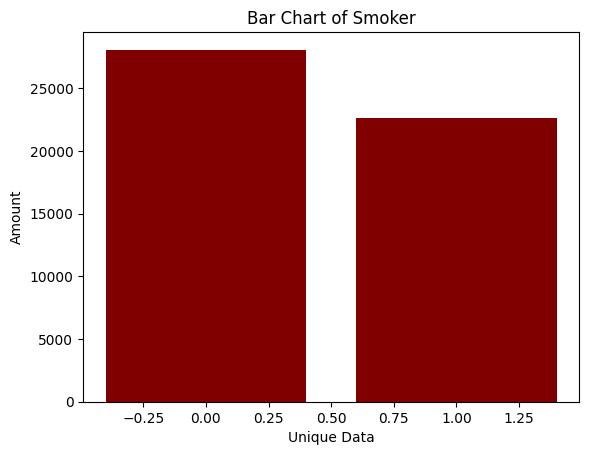

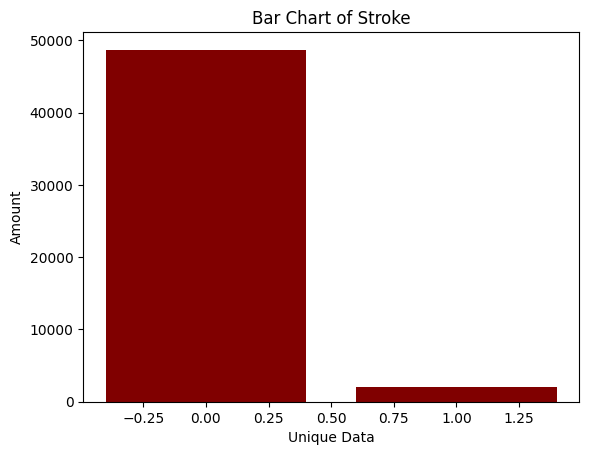

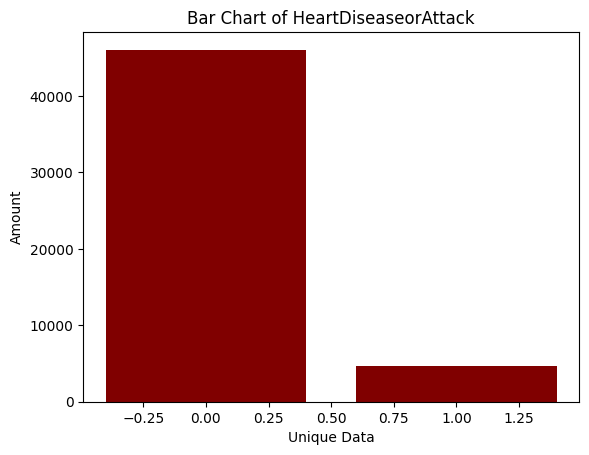

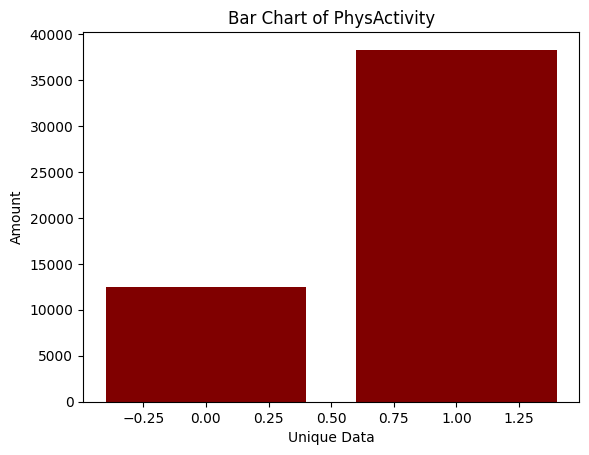

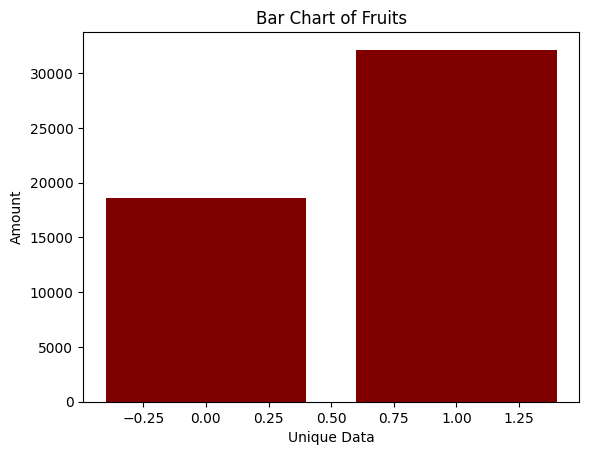

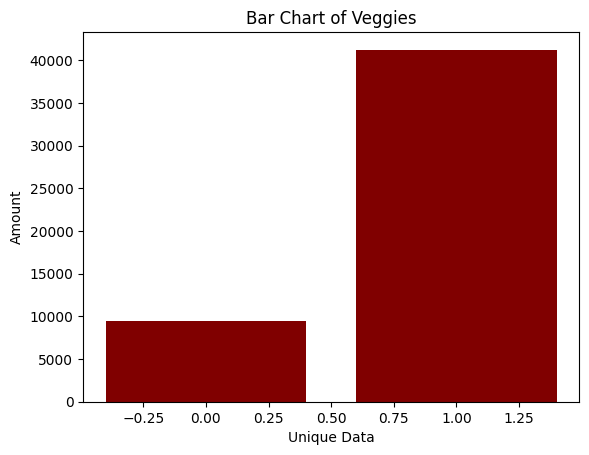

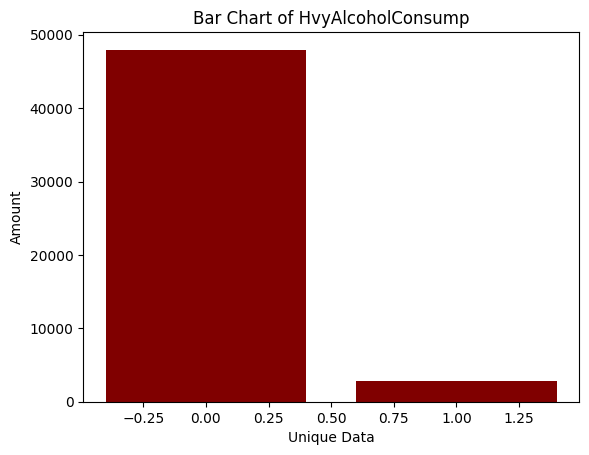

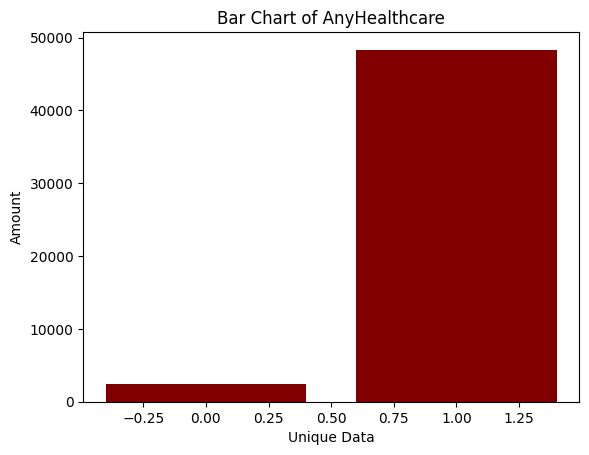

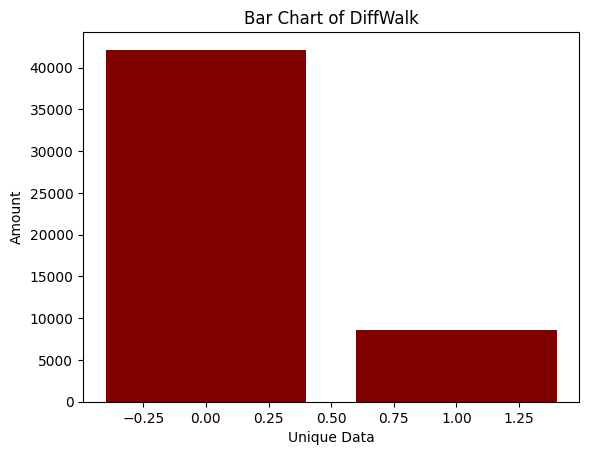

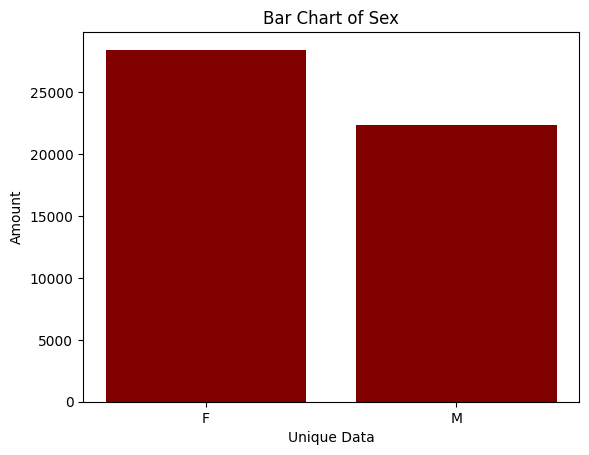

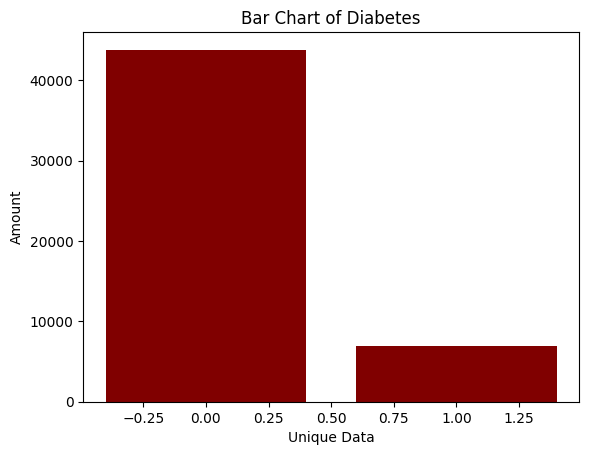

In [21]:
# Check Bar Chart

for col in categorical_arr:
  category = categorical_dict[col]['unique_data']
  amount = categorical_dict[col]['unique_data_amount']
  plt.bar(category, amount, color ='maroon')
  plt.xlabel("Unique Data")
  plt.ylabel("Amount")
  plt.title("Bar Chart of "+ col)
  plt.show()

Ketimpangan data (imbalance data) dapat dilihat menggunakan Bar Chart yang telah ditampilkan. Data imbalance memiliki kesenjangan yang tinggi.

<hr>

## #3 Rencana Penanganan (Summary)

Berdasarkan hasil dari #2, kita dapat memastikan beberapa hal yakni
* **Ada sebanyak 2329 data yang terduplikasi**
*   **Tidak ada** *missing values* pada data
*   **Terdapat** *outlier* pada fitur sbb:
1. BMI (sebanyak 1975 + 4 = 1979)
2. GenHelth (sebanyak 2365)
3. MenHtlth (sebanyak 7308)
4. PhysHtlth (sebanyak 8198)
* Data **tidak balance** dengan nilai (kolom target):
1. Diabetes_Yes (sebanyak 6946)
2. Diabetes_No (sebanyak 43790)

Dari poin di atas, beberapa rencana penanganan yang akan kami lakukan adalah sbb:
1. Untuk duplicate values, kita akan **menghapus data** yang terduplikasi dan **hanya menggunakan data yang unik saja**.
2. Untuk outlier pada fitur, kami akan **menghapus data outlier hanya untuk fitur bmi**, fitur-fitur lain dirasa tidak relevan untuk dibuang karena sizenya yang terlalu besar dan memang datanya tidak tersebar secara merata seperti BMI.
3. Untuk penanganan *data imbalance* beberapa hal yang akan adalah mengetes model dengan metode ***under-sampling*** dan ***over-sampling*** dan melihat apakah model tersebut dapat menghasilkan hasil yang maksimal.

Selain itu beberapa pemrosesan yang akan kami lakukan adalah pembuangan fitur Sex, dan HvyAlcoholConsump serta melakukan ***scaling***.

<hr>

## #4 Teknik Encoding

Teknik encoding dilakukan terhadap fitur yang bersifat kategorikal, teknik yang kami gunakan dalam encoding fitur kategorikal adalah dengan menggunakan *one-hot encoding*. Teknik ini dipilih supaya nilai pada fitur-fitur kategorikal dapat dijadikan numerik. Lalu, teknik ini digunakan hanya untuk fitur *Sex* yang memiliki nilai 'F' dan 'M'.

<hr>

## #5 Design of Experiment

1. **Tujuan Eksperimen:** Tujuan dari dilakukannya eksperimen ini adalah untuk memprediksi apakah seseorang memiliki ***diabetes*** atau tidak berdasarkan data-data yang diberikan. Berdasarkan data-data yang didapatkan kita mengaplikasikan dan melakukan tuning terhadap model-model klasifikasi yang diberikan dengan *baseline* model regresi logistik. Hasil dari tuning dan model terbaik akan dipilih sebagai prediktor terbaik untuk menentukan apakah seseorang ***diabates*** atau tidak.
2. **Variabel Dependen dan Independen:** Variabel dependen pada eksperimen ini adalah fitur **diabetes** dan fitur-fitur lain selain **diabetes** adalah variabel-variabel independen.
3. **Strategi Eksperimen:** Dalam eksperimen kali ini, strategi yang kami gunakan mencakup penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, dan undersampling. Alur yang digunakan adalah sebagai berikut:

<ol>
<li> Untuk data yang telah di preprocess, akan dilakukan splitting atau pemisahan. Tentunya pemisahan yang dilakukan adalah pemisahan data menjadi data train, valid, dan test. Penjelasan lebih lengkap dijelaskan pada bagian <b>Skema Validasi</b>.
<li> Mengingat variabel dependen yang *imbalance*, akan dilakukan *oversampling* atau *undersampling*. Hal ini dilakukan untuk menghindari hasil yang bias. Namun, hal ini dapat berubah menyesuaikan apabila hasil menggunakan metode ini tidak memenuhi ekspektasi.
<li> Model yang digunakan dapat berubah. Beberapa model yang akan kami gunakan adalah MLP, KNN, dan Logistic Regression. 
<li> Untuk setiap proses menggunakan masing-masing model, kami akan melakukan *hyperparameter tuning*. Salah satu yang akan kami gunakan adalah dengan *grid search*.
<li> Mengingat terdapat 3 model yang kami gunakan, kami akan melakukan *Model Stacking* terhadap hasil prediksi dari seluruh model tersebut. Hal ini dilakukan guna menghasilkan prediksi yang lebih baik.
</ol>

4. **Skema Validasi (pada data train):** Skema validasi yang digunakan pada DoE data train adalah menggunakan **stratified 10-fold cross-validation** karena skema ini biasanya dipilih untuk data yang imbalance. Jadi awalnya data akan displit 80/20, 80 untuk train dan 20 untuk test, kemudian data train ini akan dilakukan skema validasi dengan 10-fold cross-validation untuk pelatihan model. Validasi hasil akhir tetap menggunakan nilai awal 20% data test.

<hr>

# Bagian 2

## Splitting Dataset

In [22]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print("Train data: ", len(X_train))
print("Val data:", len(X_val))
print("Test data:", len(X_test))

Train data:  30895
Val data: 7724
Test data: 9655


## Sampling

### Oversampling

In [23]:
ros = RandomOverSampler(random_state=42)

X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

print("Resampled data:", len(X_oversampled))

Resampled data: 52892


### Undersampling

In [24]:
ros = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = ros.fit_resample(X_train, y_train)

print("Resampled data:", len(X_undersampled))

Resampled data: 8898


## Training and Tuning

### Logistic Regression Model

In [25]:
def logreg_train_tuning(X_train, y_train, X_val, y_val):

    # List Hyperparameters
    penalty = ['l1', 'l2']
    C = np.logspace(-4,4,20)

    # Make it as a dictionary
    hyperparameters = dict(penalty=penalty, C=C)

    # Use grid search, cv = crossvalidation = 10
    logreg = LogisticRegression(random_state=42, max_iter=1000) # Already declared in Part 1
    clf = GridSearchCV(logreg, hyperparameters, cv=10)
    
    best_model = clf.fit(X_train,y_train)

    # Print Tuning Result
    print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])

    y_pred = best_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, labels=['True', 'False'])

    print(report)
    print("F1", f1)
    print("Accuracy", acc)

    return best_model


def logreg_train(X_train, y_train, X_val, y_val, penalty, c):

    # Use grid search, cv = crossvalidation = 10
    logreg = LogisticRegression(random_state=42, max_iter=1000, penalty=penalty, C=c) # Already declared in Part 1
    
    model = logreg.fit(X_train,y_train)

    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, labels=['True', 'False'])

    print(report)
    print("F1", f1)
    print("Accuracy", acc)

    return model


In [28]:
# Original Data
print("ORIGINAL DATA")
logreg_model = logreg_train_tuning(X_train, y_train, X_val, y_val)
# logreg_model = logreg_train(X_train, y_train, X_val, y_val, 'l2', 1.0)

# Oversampled Data
print("OVERSAMPLED DATA")
logreg_model_over = logreg_train_tuning(X_oversampled, y_oversampled, X_val, y_val)
# logreg_model_over = logreg_train(X_oversampled, y_oversampled, X_val, y_val, 'l2', 1.0)

# Undersampled Data
print("UNDERSAMPLED DATA")
logreg_model_under  = logreg_train_tuning(X_undersampled, y_undersampled, X_val, y_val)
# logreg_model_under  = logreg_train(X_undersampled, y_undersampled, X_val, y_val, 'l2', 1.0)

ORIGINAL DATA
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/shared-libs/python3.11/py/lib/python3.11/site-packages

### KNN Model

In [ ]:
def knn_train_tuning(X_train, y_train, X_val, y_val):
    best_f1 = 0
    best_acc = 0
    best_neigh = 0

    n_neighbors = np.arange(2, 10, 1)
    hyperparameters = dict(n_neighbors=n_neighbors)
    
    neigh = KNeighborsClassifier()
    clf = GridSearchCV(neigh, hyperparameters, cv=10)
    
    best_model = clf.fit(X_train, y_train)

    # Print Tuning Result
    print('Best N Neighbour:', best_model.best_estimator_.get_params()['n_neighbors'])

    y_pred = best_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, labels=['True', 'False'])

    print(report)
    print("F1", f1)
    print("Accuracy", acc)

    return best_model



def knn_train(X_train, y_train, X_val, y_val, n_neighbor):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbor)
    model = neigh.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, labels=['True', 'False'])

    print(report)
    print("F1", f1)
    print("Accuracy", acc)

    return best_model

In [ ]:
# Original Data
print("ORIGINAL DATA")
knn_model = knn_train_tuning(X_train, y_train, X_val, y_val)
# knn_model = knn_train(X_train, y_train, X_val, y_val, 5)

# Oversampled Data
print("OVERSAMPLED DATA")
knn_model_over = knn_train_tuning(X_oversampled, y_oversampled, X_val, y_val)
# knn_model_over = knn_train(X_oversampled, y_oversampled, X_val, y_val, 5)

# Undersampled Data
print("UNDERSAMPLED DATA")
knn_model_under = knn_train_tuning(X_undersampled, y_undersampled, X_val, y_val)
# knn_model_under = knn_train(X_undersampled, y_undersampled, X_val, y_val, 5)

ORIGINAL DATA
Best N Neighbour: 8
              precision    recall  f1-score   support

        True       0.40      0.09      0.15      1122
       False       0.86      0.98      0.92      6602

   micro avg       0.85      0.85      0.85      7724
   macro avg       0.63      0.53      0.53      7724
weighted avg       0.80      0.85      0.80      7724

F1 0.8045025636281455
Accuracy 0.8478767477990679
OVERSAMPLED DATA
Best N Neighbour: 2
              precision    recall  f1-score   support

        True       0.30      0.30      0.30      1122
       False       0.88      0.88      0.88      6602

   micro avg       0.80      0.80      0.80      7724
   macro avg       0.59      0.59      0.59      7724
weighted avg       0.80      0.80      0.80      7724

F1 0.7966287408977568
Accuracy 0.7964785085447954
UNDERSAMPLED DATA
Best N Neighbour: 9
              precision    recall  f1-score   support

        True       0.27      0.73      0.39      1122
       False       0.94     

### MLP Classifier

In [ ]:
def mlp_train_tuning(X_train, y_train, X_val, y_val):
    best_f1 = 0
    best_acc = 0
    best_hidden_layer_sizes = ()
    best_model = None

    for i in range(5,11):
        for j in range(2,6):
            clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(i, j), random_state=42, max_iter=100)
            model = clf.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            
            f1 = f1_score(y_val, y_pred, average='weighted')
            acc = accuracy_score(y_val, y_pred)
            
            if (f1 > best_f1 and acc > best_acc):
                best_acc = acc
                best_f1 = f1
                best_hidden_layer_sizes = (i,j)
                best_model = model

    # Print Tuning Result
    print('Best Hidden Layer Sizes:', best_hidden_layer_sizes)

    report = classification_report(y_val, y_pred, labels=['True', 'False'])

    print(report)
    print("F1", best_f1)
    print("Accuracy", best_acc)

    return best_model

def mlp_train(X_train, y_train, X_val, y_val, hidden_layer_sizes):


    clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=hidden_layer_sizes, random_state=42, max_iter=100)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, labels=['True', 'False'])

    print(report)
    print("F1", f1)
    print("Accuracy", acc)

    return model


In [ ]:
# Original Data
print("ORIGINAL DATA")
mlp_model = mlp_train_tuning(X_train, y_train, X_val, y_val)
# mlp_model = mlp_train(X_train, y_train, X_val, y_val, (8,5))

# Oversampled Data
print("OVERSAMPLED DATA")
mlp_model_over = mlp_train_tuning(X_oversampled, y_oversampled, X_val, y_val)
# mlp_model_over = mlp_train(X_oversampled, y_oversampled, X_val, y_val, (8,5))

# Undersampled Data
print("UNDERSAMPLED DATA")
mlp_model_under = mlp_train_tuning(X_undersampled, y_undersampled, X_val, y_val)
# mlp_model_under = mlp_train(X_undersampled, y_undersampled, X_val, y_val, (8,5))

ORIGINAL DATA
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs 

## Model Stacking

In [ ]:
# After several considerations, model with oversampling is chosen
logreg_y_pred_train = logreg_model_over.predict(X_oversampled)
knn_y_pred_train = knn_model_over.predict(X_oversampled)
mlp_y_pred_train = mlp_model_over.predict(X_oversampled)

logreg_y_pred_test = logreg_model_over.predict(X_test)
knn_y_pred_test = knn_model_over.predict(X_test)
mlp_y_pred_test = mlp_model_over.predict(X_test)


In [ ]:
# Combine base model predictions into meta features
# meta_features_train = np.column_stack((logreg_y_pred_train, knn_y_pred_train, mlp_y_pred_train))
# meta_features_test = np.column_stack((logreg_y_pred_test, knn_y_pred_test, mlp_y_pred_test))
# We are no longer using KNN for several reasons. The model stacking only consists of Logistic Regressions and MLP Models.

meta_features_train = np.column_stack((logreg_y_pred_train, mlp_y_pred_train))
meta_features_test = np.column_stack((logreg_y_pred_test, mlp_y_pred_test))

# Initialize meta model
ridge = Ridge(alpha=0.5)
ridge.fit(meta_features_train, y_oversampled)



Ridge(alpha=0.5)

## Prediction

In [ ]:
# Use to predict the meta_test

y_final_pred = ridge.predict(meta_features_test)
# Adjustment to Boolean Type
df_pred = pd.DataFrame({'pred':y_final_pred})
df_pred = df_pred.round(0).astype(bool)

report = classification_report(y_test, df_pred['pred'], labels=['True', 'False'])
f1 = f1_score(y_test, df_pred['pred'], average='weighted')
acc = accuracy_score(y_test, df_pred['pred'])
print(report)
print("F1-Score", f1)
print("Accuracy", acc)

              precision    recall  f1-score   support

        True       0.30      0.75      0.43      1336
       False       0.95      0.72      0.82      8319

   micro avg       0.72      0.72      0.72      9655
   macro avg       0.62      0.73      0.62      9655
weighted avg       0.86      0.72      0.76      9655

F1-Score 0.7639928598771132
Accuracy 0.7237700673226307


<hr>

## Stratified 10-Fold Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []
X_temp = X.copy(deep=True)
y_temp = y.copy(deep=True)

for train_index, test_index in skf.split(X_temp, y_temp):
    X_train_res, X_test_res = X_temp.iloc[train_index], X_temp.iloc[test_index]
    y_train_res, y_test_res = y_temp.iloc[train_index], y_temp.iloc[test_index]

    ridge.fit(X_train_res, y_train_res)

    y_pred = ridge.predict(X_test_res)

    scores.append(mean_squared_error(y_test_res, y_pred))

acc_score = np.mean(scores)
print(f"Average Mean Squared Error: {acc_score}")

Average Mean Squared Error: 0.10351810572178063


# Lampiran

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen,
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 25 April 2023, pukul 12.00 WIB
- _Deliverable_ poin 2: Senin, 25 April 2023, pukul 21.00 WIB
- _Deliverable_ poin 3: Senin, 25 April 2023, pukul 21.00 WIB

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8629c40-3ecd-46ae-b6c8-439e0cd1affc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>